0.05


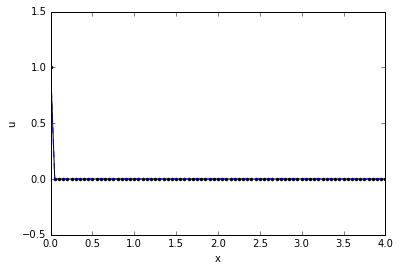

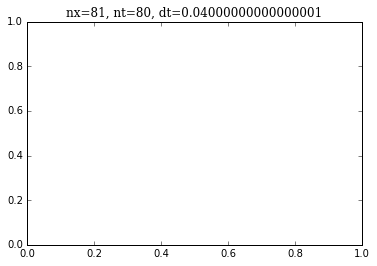

In [5]:
# --Schemes for convection
import numpy 
from matplotlib import pyplot

# set the interactive mode to get an animation on screen
pyplot.ion()

# parameters
nx = 81      # number of x-intervals
nt = 80      # number of time intervals
sigma = 0.8
c  = 1.
dx = 4.0/(nx-1)
print(dx)
dt = sigma * dx/c

# initialization
x =  numpy.arange(0,4+dx,dx)
u =  numpy.zeros(nx)
un = numpy.zeros(nx)
unminus1 = numpy.zeros(nx)
u[0]  = 1          # sets the rhs value to 1
un[0] = 1
unminus1[0] = 1

# plot initial condition        
line1,line2 = pyplot.plot(x,u,'k.-',x,u, 'b--')
pyplot.axis([0,4,-0.5,1.5])
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.show()
pyplot.title('nx='+str(nx)+', nt='+str(nt)+', dt='+str(dt), family='serif')

for i in range(1,nx):
    # backward difference for first step in time
    u[i] = un[i]- sigma*( un[i]- un[i-1] )

for it in range(1,nt):
    un = u.copy()
    for i in range(1,nx-1):
        # leapfrog
        u[i] = unminus1[i]- sigma*( un[i+1]- un[i-1] )
    u[0] = 1
    unminus1 = un.copy()
    line1.set_ydata(u)
    line2.set_ydata(numpy.where(x < c*dt*(it+1), numpy.ones(nx),numpy.zeros(nx) ) )
    pyplot.pause(0.03)
